# Imports

In [1]:
from src.trade_logic.AverageCrossLogic import AverageCrossLogic
from src.models.Trade import Trade
from src.Backtest import Backtest
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

# Backtest

In [2]:
from src.indicators.MovingAverage import MovingAverage
from src.utils.TimeToTrade import TimeToTrade

###################################################################
#                               INPUTS                            #
###################################################################

## Backtest
input_limit_history=100

## Trade configurations
input_symbol='WIN$N'
input_timeframe=Backtest.ENUM_TIMEFRAME_M5
input_take_stop_calc_type=Trade.ENUM_TAKE_STOP_CALC_TYPE_PTS
input_stop_loss=300
input_take_profit=600

## Indicators configurations
    # Fast Moving Average
input_fast_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_fast_period=9
    # Slow Moving Average
input_slow_ma_calc_type=MovingAverage.ENUM_AVERAGE_TYPE_SMA
input_slow_period=20

## Time to trade configurations
input_time_to_open_trades='09:00:00'
input_time_to_stop_opening_trades='15:00:00'
input_time_to_close_trades='17:00:00'

###################################################################

# Define plot all reports
plot_reports=False

# Build trade logic
tl = AverageCrossLogic(1,ENUM_TAKE_STOP_CALC_TYPE=input_take_stop_calc_type,stop_loss=input_stop_loss,take_profit=input_take_profit,
    INPUTS=AverageCrossLogic.INPUTS_AC_LOGIC(
        fast_ma_inputs=MovingAverage.INPUTS_MA(input_fast_ma_calc_type,input_fast_period),
        slow_ma_inputs=MovingAverage.INPUTS_MA(input_slow_ma_calc_type,input_slow_period),
        trading_time=TimeToTrade(input_time_to_open_trades, input_time_to_stop_opening_trades, input_time_to_close_trades)
    )
)

# Call backtest
bt = Backtest(symbol=input_symbol,ENUM_TIMEFRAME=input_timeframe,trade_logic=tl,plot_report=plot_reports,limit_history=input_limit_history)

# Run backtest
if bt: trades=bt.run()

# Report


					Trading test (WIN$N) backtest:

Gross profit: 			 1262930.0			Winner trades: 		 2797
Gross loss: 			 -1275405.0			Losing trades: 		 5061
Largest profit trade:		 600.0				Largest loss trade:	 -300.0
Average profit trade: 		 451.53				Average loss trade: 	 -252.01 

Profit trades (% of total): 	 34.7 %

Profit factor: 			 0.99
Profit/Loss: 			 1.79
Total Net profit: 		 -12475.0
Percentual return: 		 -20.66 %

Number of trades: 		 8060
Bought trades: 			 4006
Sold trades: 			 4054 

Balance Drawdown Maximal: 	 60375.0
Balance Drawdown Maximal (%): 	 2322.12
Balance Drawdown Maximal Time Range: 2018-11-09 14:10:00  until  2020-09-17 13:05:00


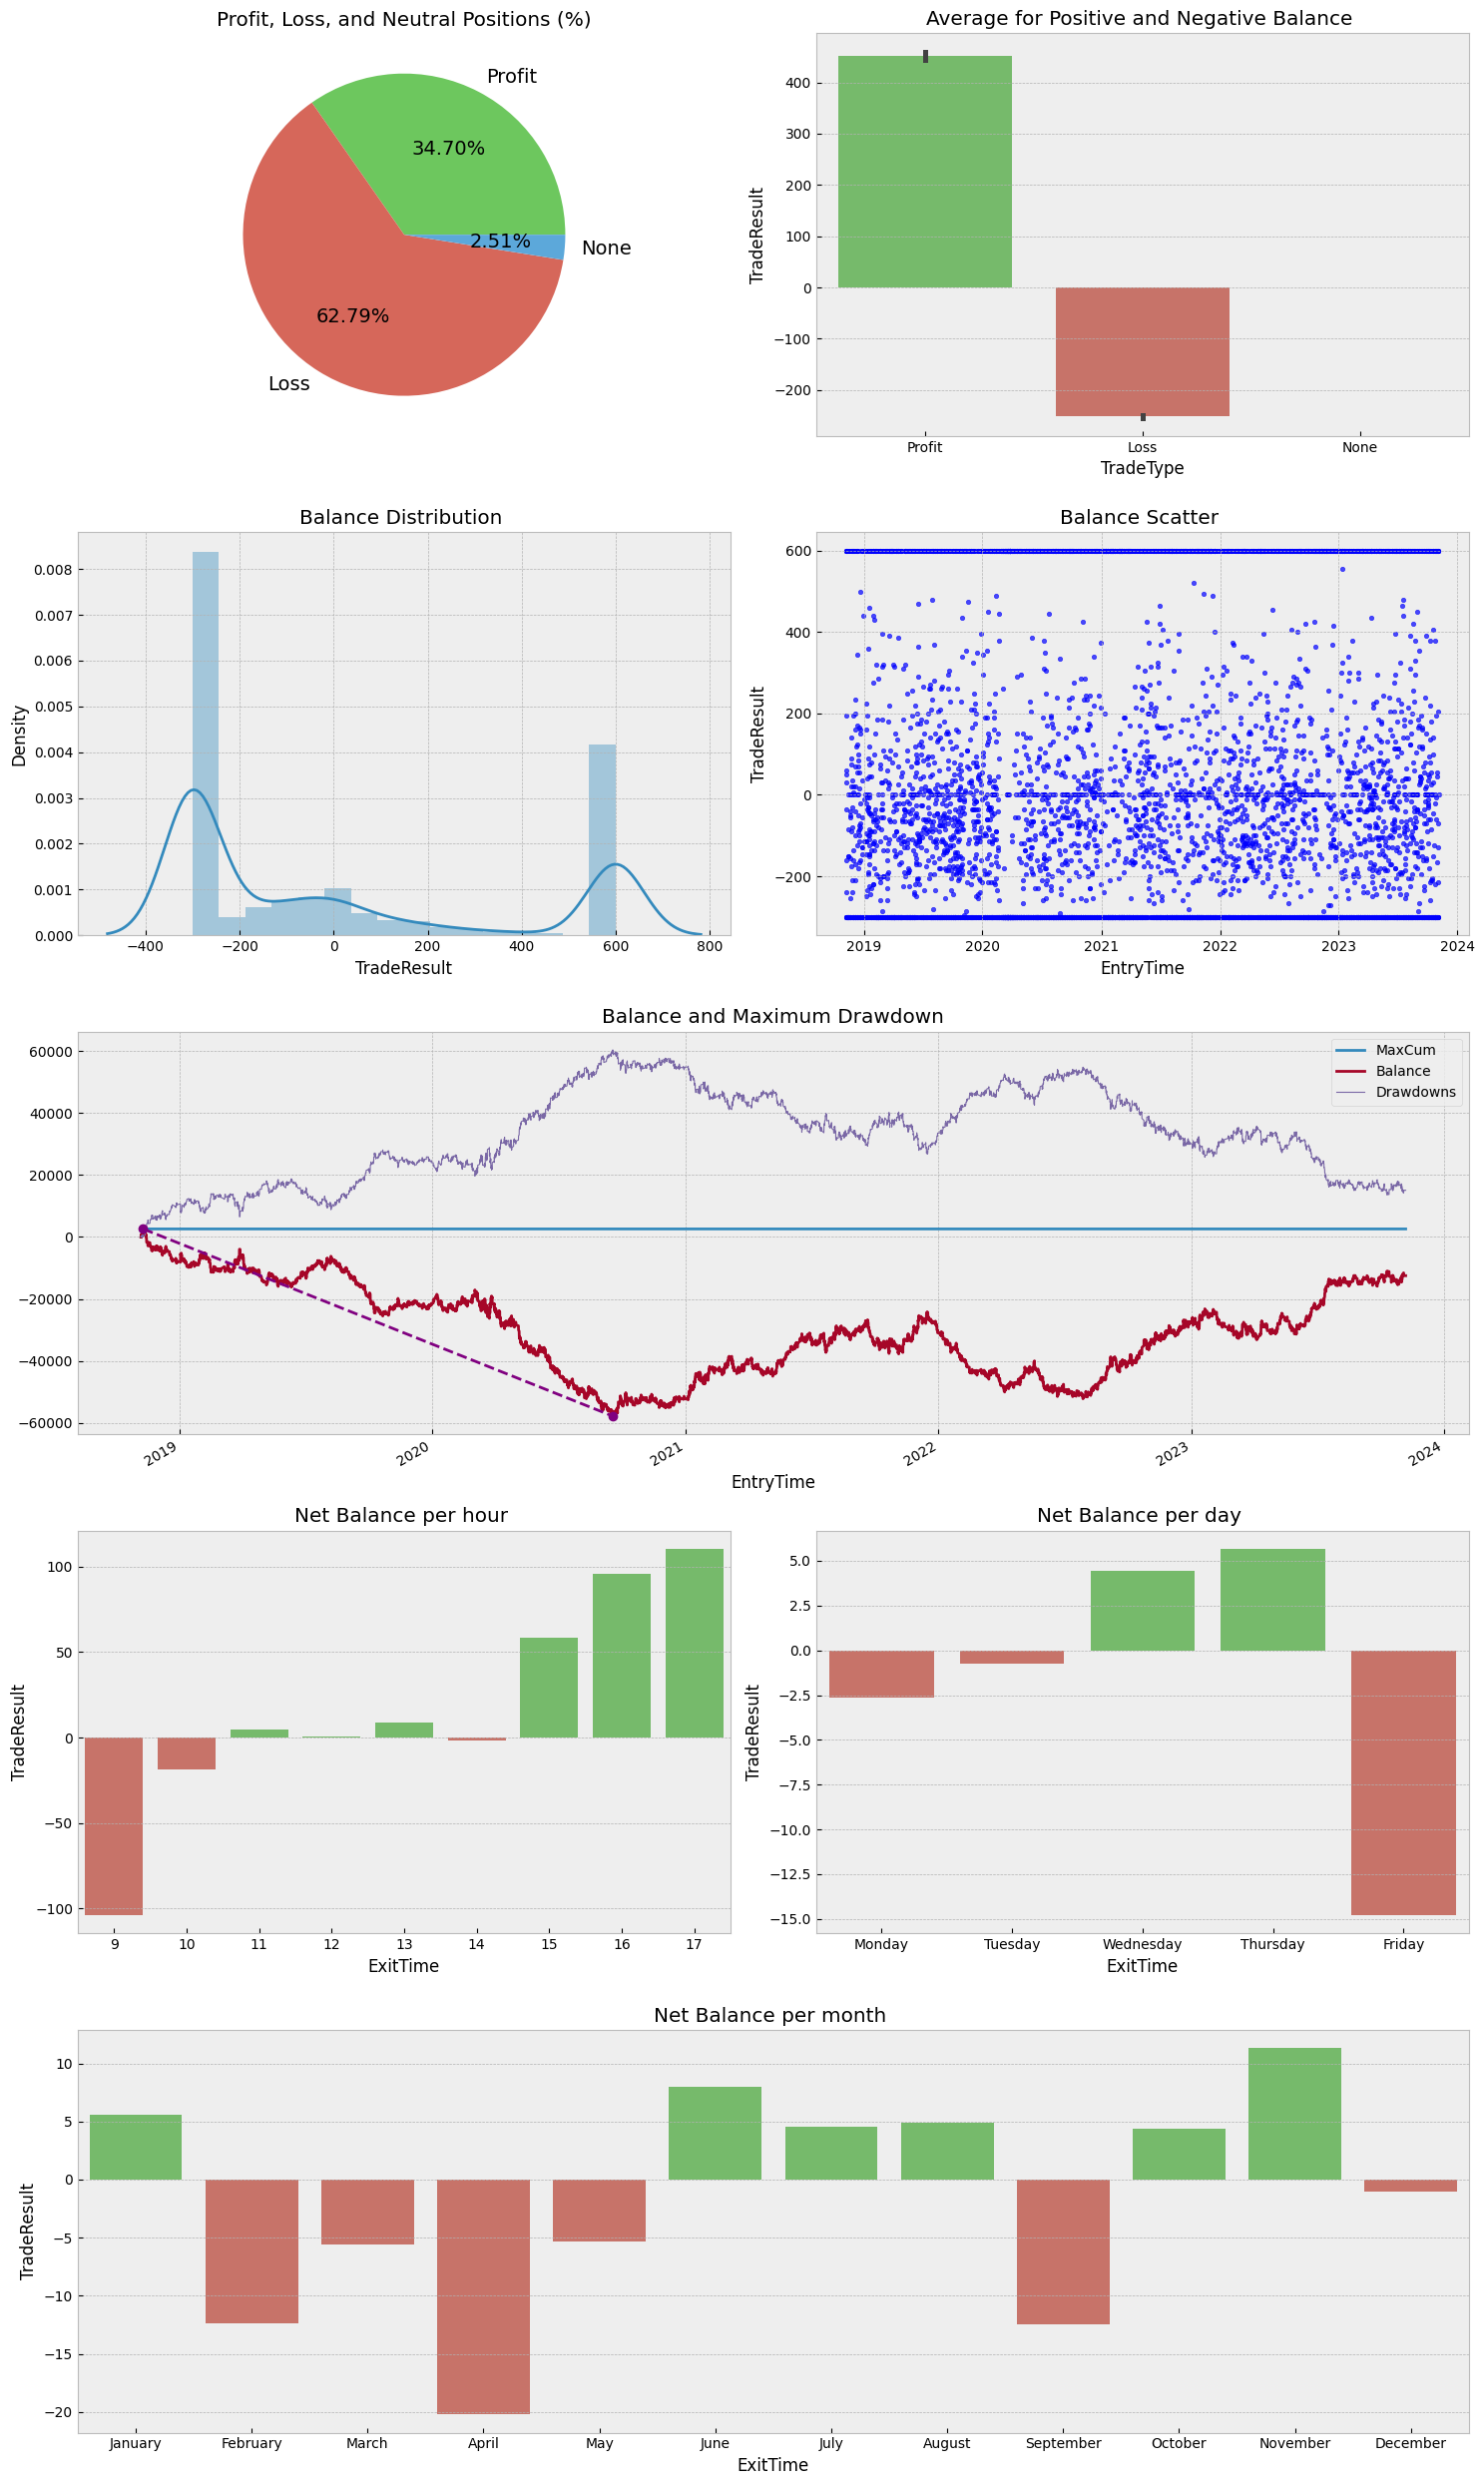

In [3]:
if not plot_reports: bt.get_report_pointer().plot_report()

# Optimizer

In [4]:
from src.optimizer.OptimizeOptions import OptimizeOptions
from src.optimizer.Optimizer import Optimizer

opt=Optimizer(
    symbol=input_symbol,
    ENUM_TIMEFRAME=input_timeframe,
    trade_logic=tl.optimize_possibilities(
        stop_loss=OptimizeOptions.float(300,500,100),
        take_profit=OptimizeOptions.float(500,1000,100),
        # slow_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # slow_ma_period=OptimizeOptions.int(8,20,2),
        # fast_ma_calc_type=OptimizeOptions.moving_average_calc_type(),
        # fast_ma_period=OptimizeOptions.int(20,100,10),
        time_to_open_trades=OptimizeOptions.time('09:00:00','10:00:00', 60*30),
        time_to_stop_open=OptimizeOptions.time('14:00:00','16:00:00', 60*30),
        time_to_close_trades=OptimizeOptions.time('17:30:00','18:00:00', 60*30)
    ),
    limit_history=100
)

Max result

In [5]:
opt.get_max_result_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 300,
 'take_profit': 800,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20}


					Trading opt/119 (WIN$N) backtest:

Gross profit: 			 1238710.0			Winner trades: 		 2364
Gross loss: 			 -1183945.0			Losing trades: 		 4736
Largest profit trade:		 800.0				Largest loss trade:	 -300.0
Average profit trade: 		 523.99				Average loss trade: 	 -249.99 

Profit trades (% of total): 	 32.71 %

Profit factor: 			 1.05
Profit/Loss: 			 2.1
Total Net profit: 		 54765.0
Percentual return: 		 239.1 %

Number of trades: 		 7227
Bought trades: 			 3572
Sold trades: 			 3655 

Balance Drawdown Maximal: 	 22905.0
Balance Drawdown Maximal (%): 	 134.66
Balance Drawdown Maximal Time Range: 2021-12-03 12:20:00  until  2022-08-11 10:00:00


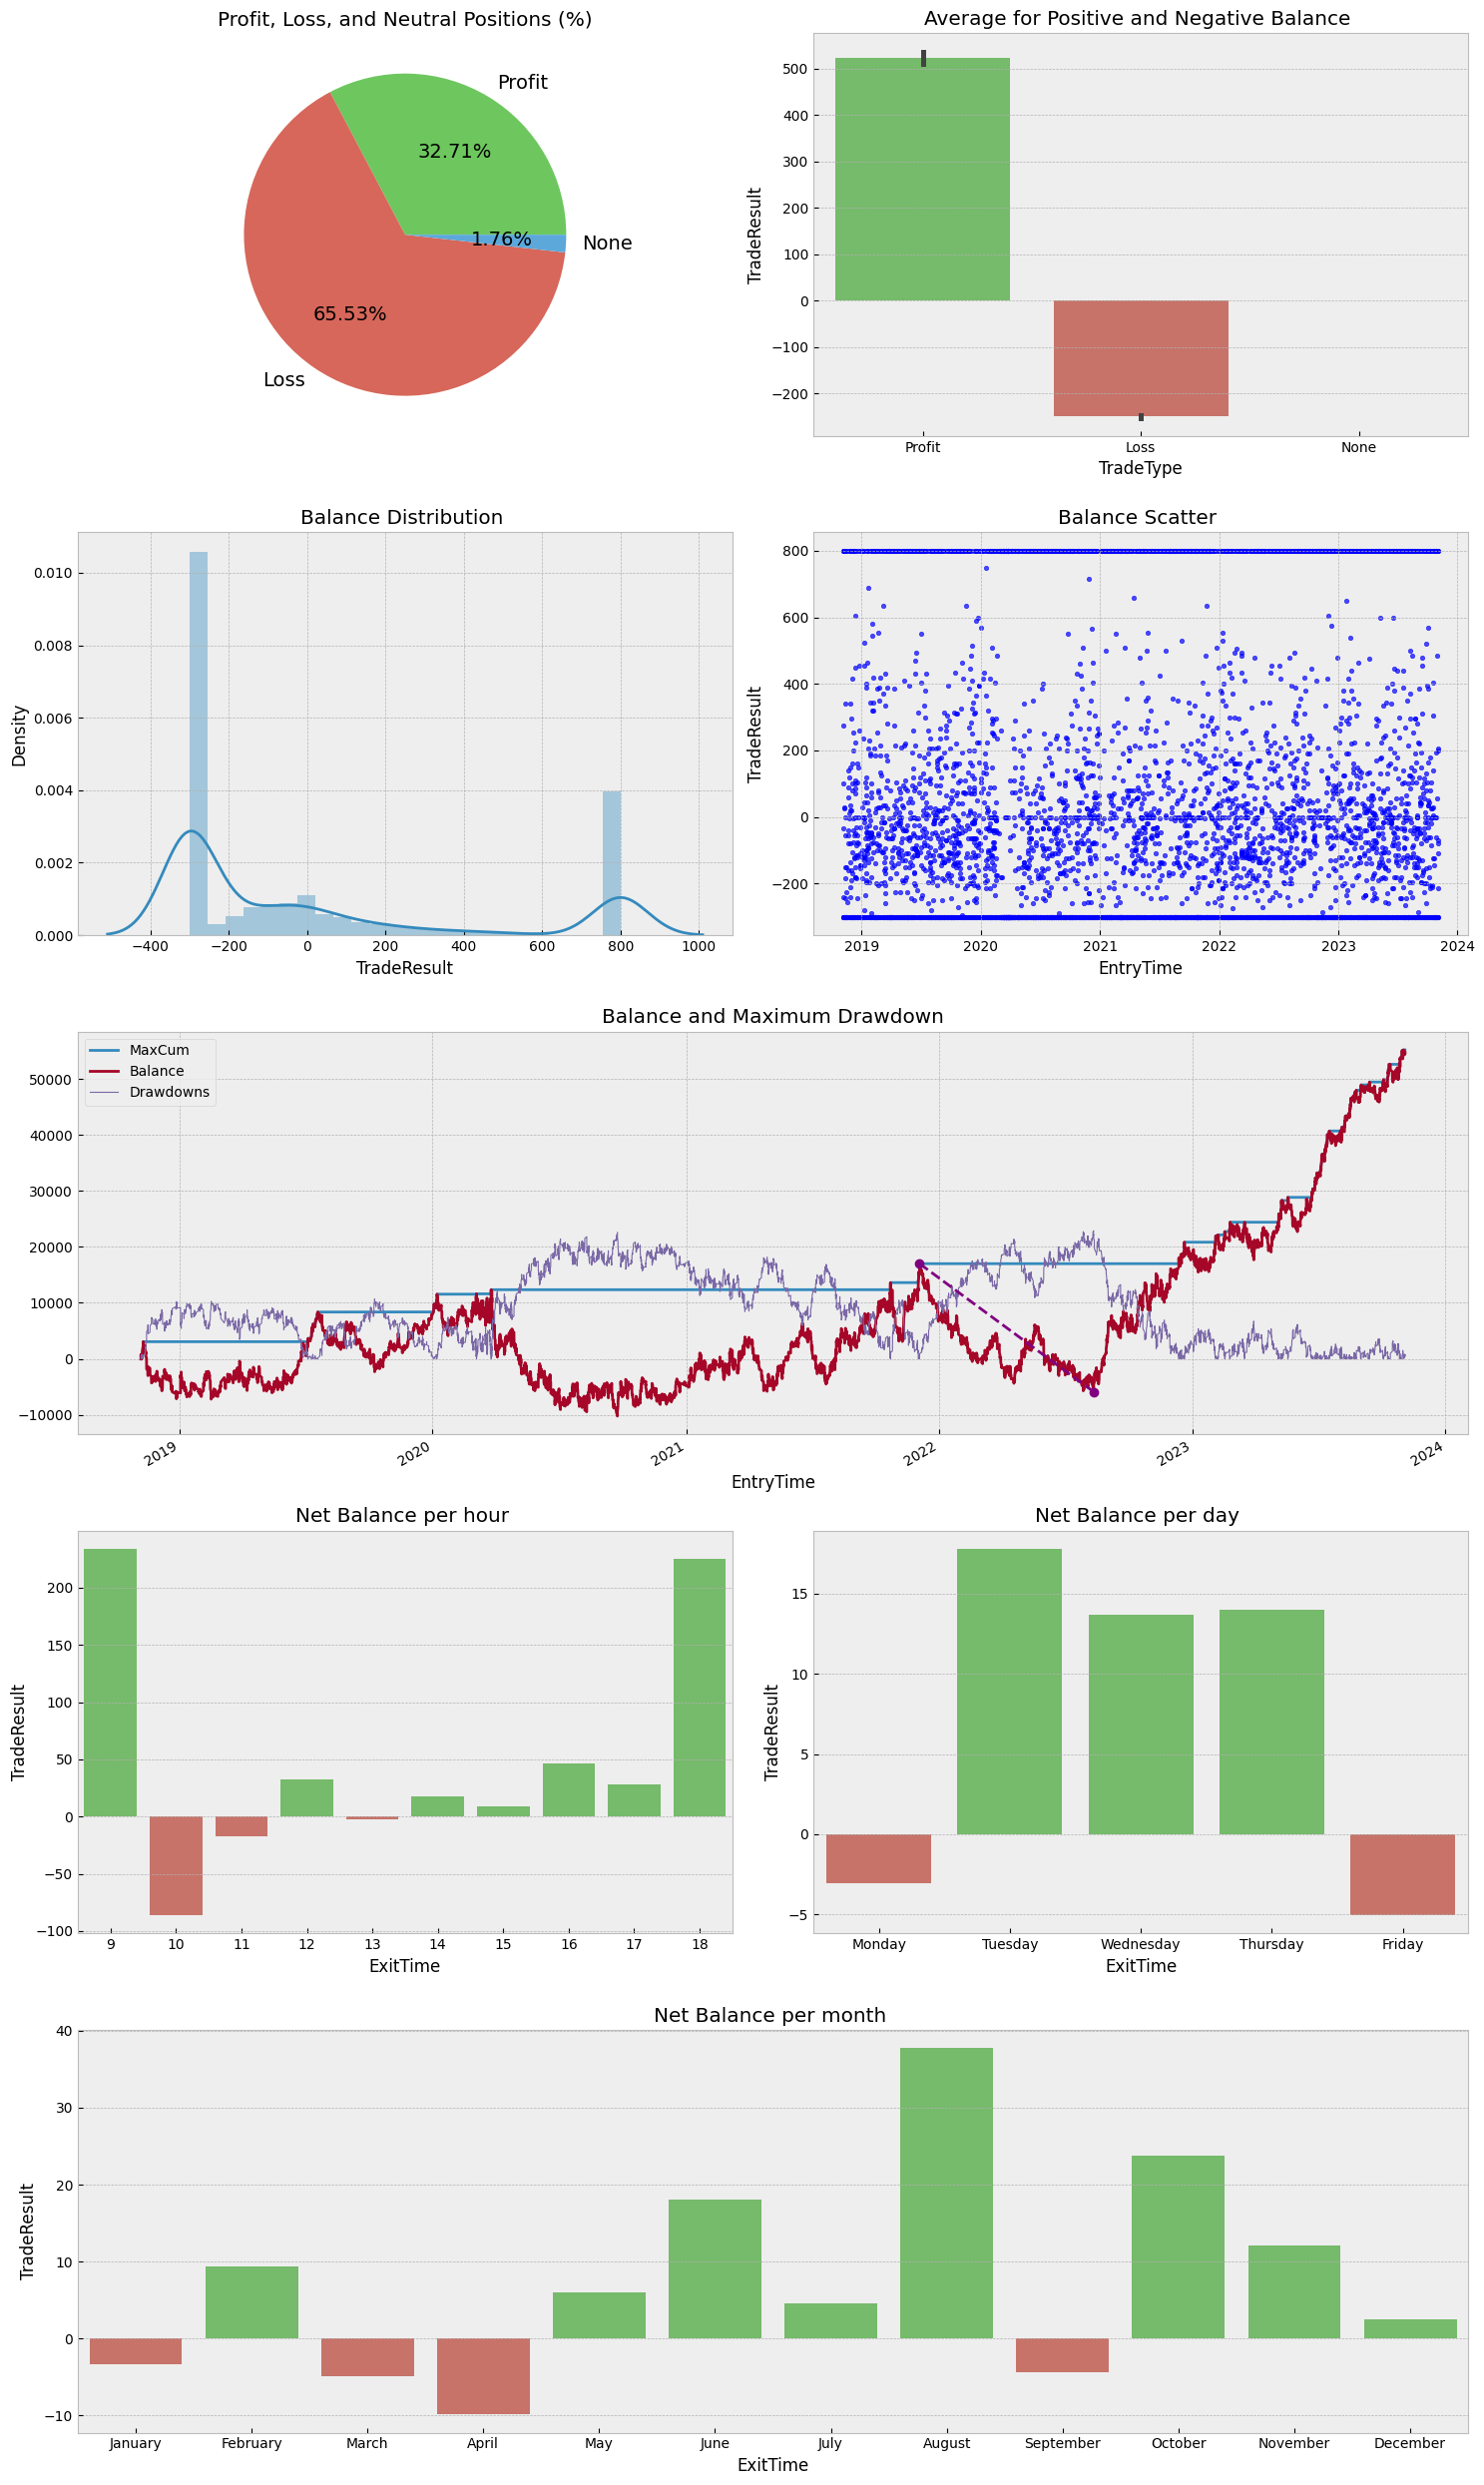

In [6]:
opt.get_max_result_bt()['bt'].get_report_pointer().plot_report()

Min drawdown

In [7]:
opt.get_min_drawdown_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 300,
 'take_profit': 900,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20}


					Trading opt/140 (WIN$N) backtest:

Gross profit: 			 914475.0			Winner trades: 		 1639
Gross loss: 			 -888230.0			Losing trades: 		 3423
Largest profit trade:		 900.0				Largest loss trade:	 -300.0
Average profit trade: 		 557.95				Average loss trade: 	 -259.49 

Profit trades (% of total): 	 31.79 %

Profit factor: 			 1.03
Profit/Loss: 			 2.15
Total Net profit: 		 26245.0
Percentual return: 		 132.52 %

Number of trades: 		 5155
Bought trades: 			 2566
Sold trades: 			 2589 

Balance Drawdown Maximal: 	 19805.0
Balance Drawdown Maximal (%): 	 643.02
Balance Drawdown Maximal Time Range: 2018-11-09 12:55:00  until  2020-08-13 11:45:00


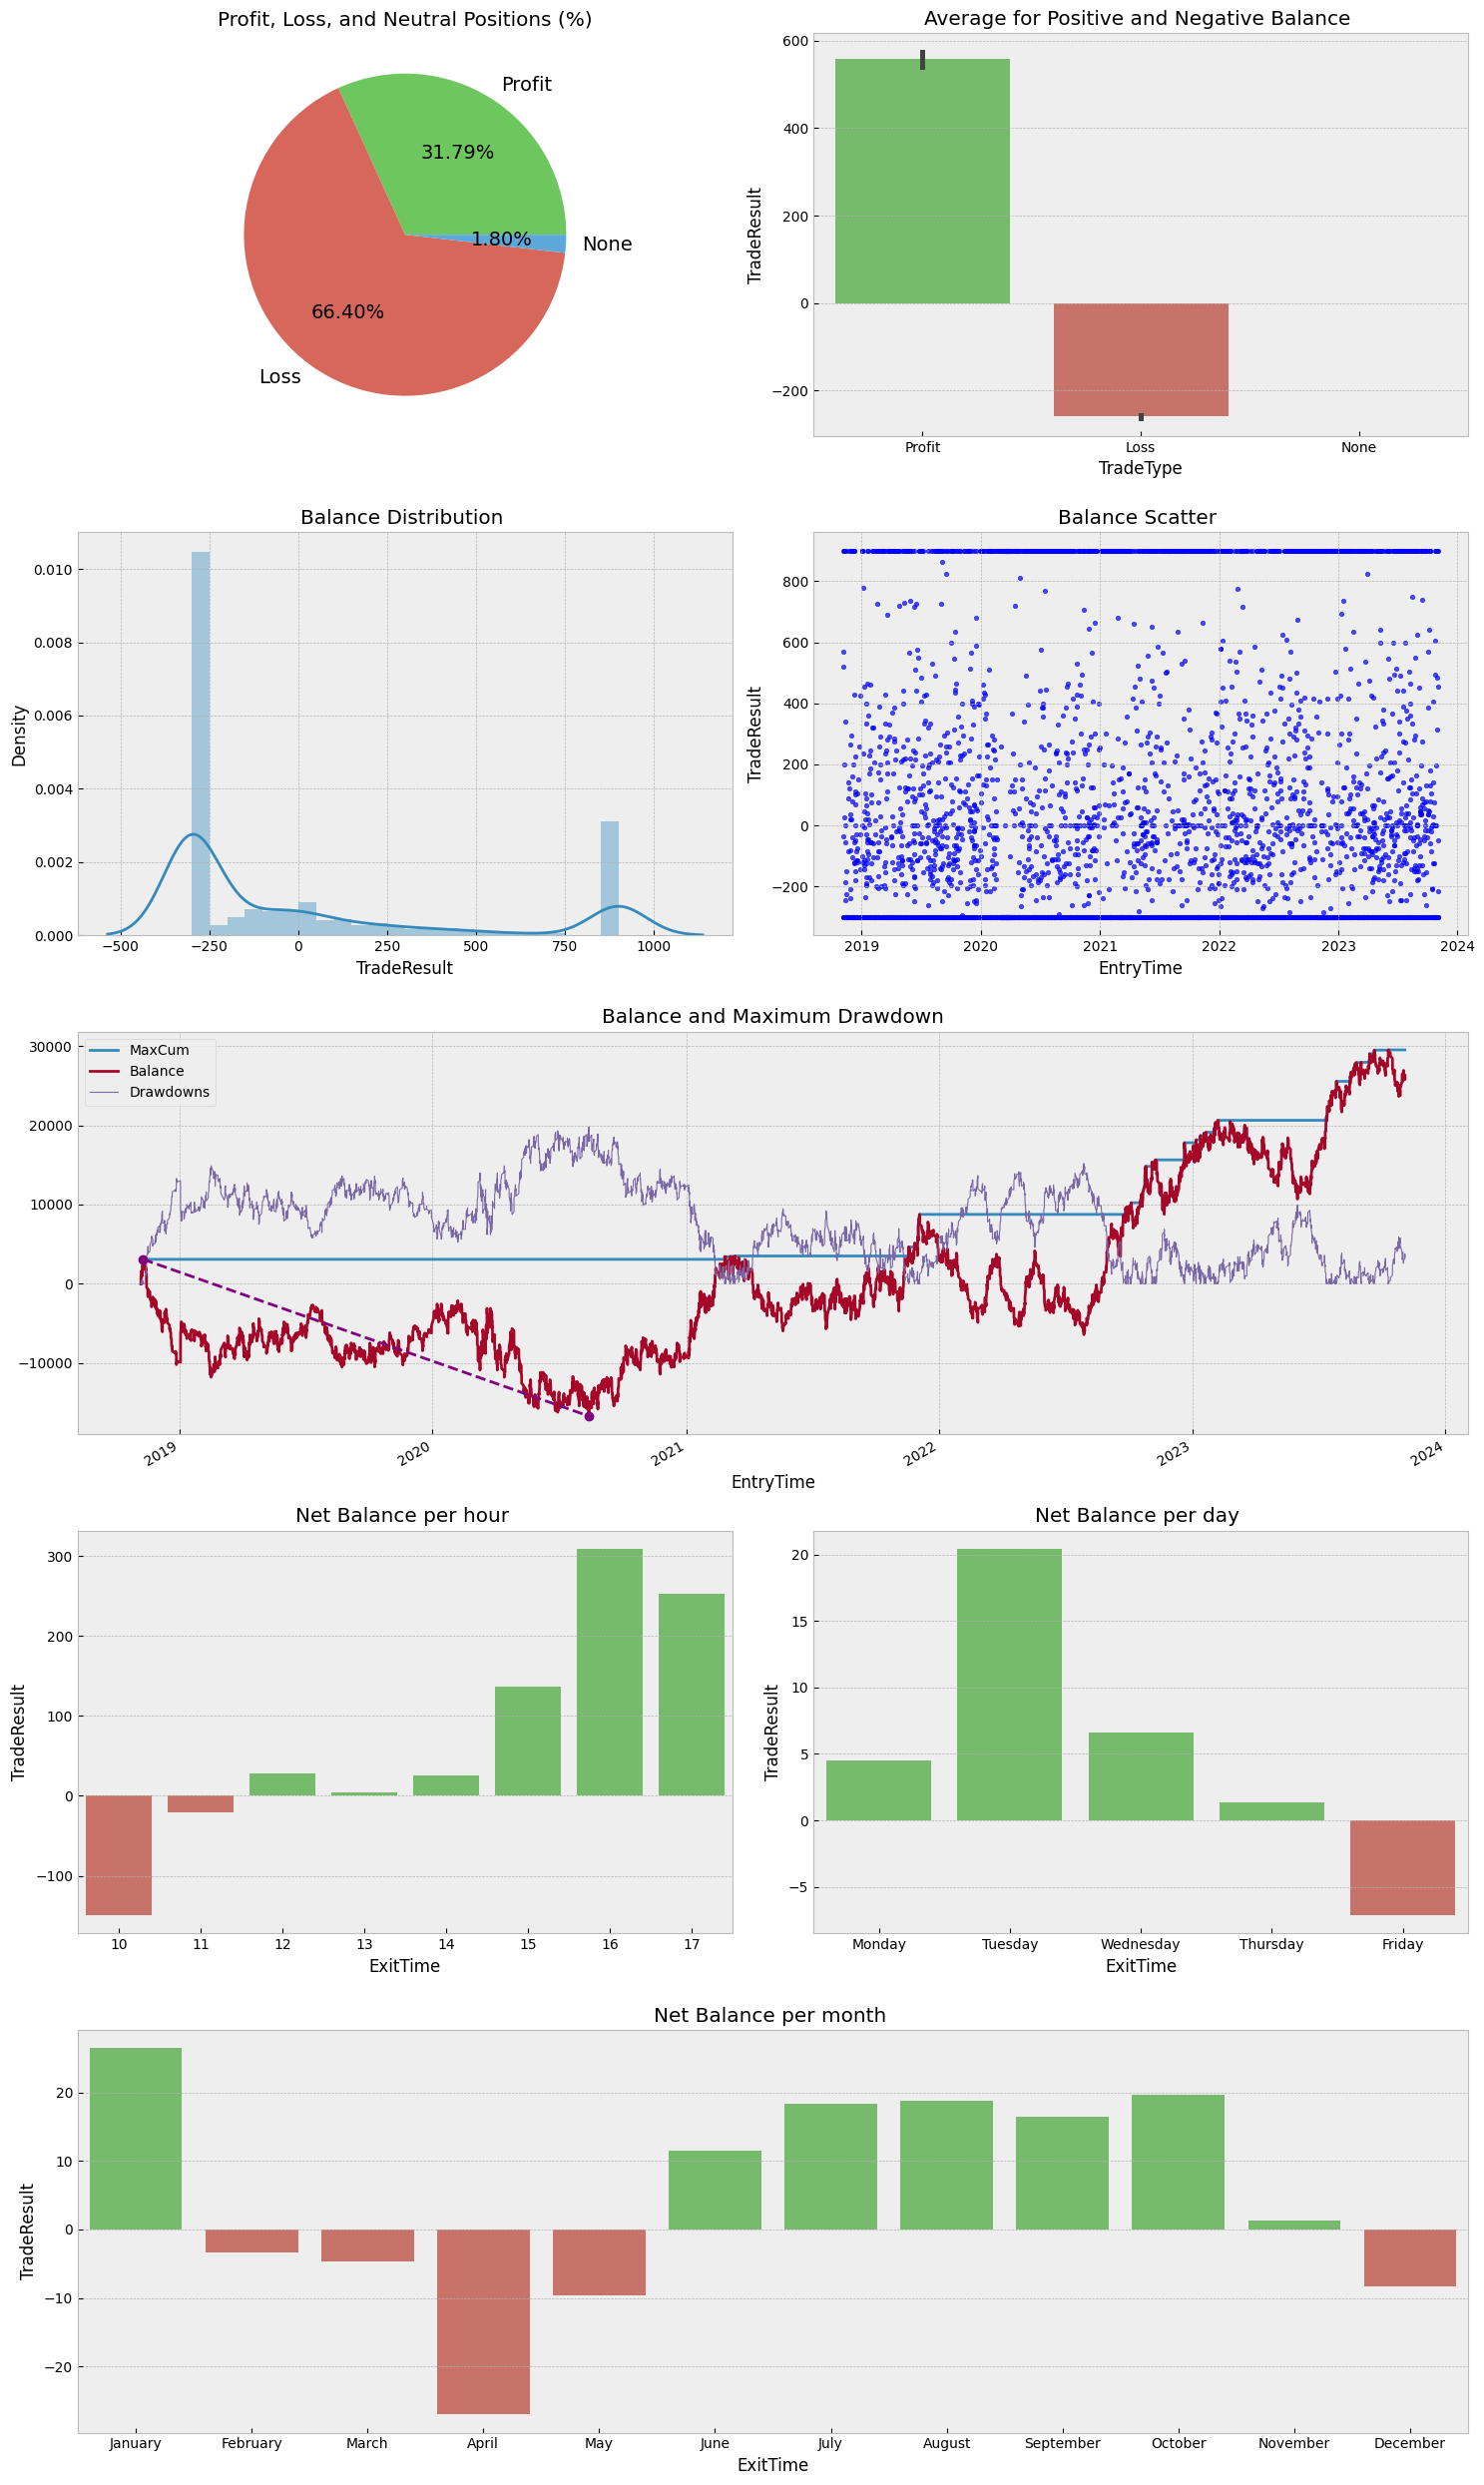

In [8]:
opt.get_min_drawdown_bt()['bt'].get_report_pointer().plot_report()

Max profit factor

In [9]:
opt.get_max_profit_factor_bt()['inpts']

{'qty': 1,
 'ENUM_TAKE_STOP_CALC_TYPE': 'PTS',
 'stop_loss': 300,
 'take_profit': 800,
 'fast_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'fast_ma_period': 9,
 'slow_ma_ENUM_AVERAGE_TYPE': 'SMA',
 'slow_ma_period': 20}


					Trading opt/119 (WIN$N) backtest:

Gross profit: 			 1238710.0			Winner trades: 		 2364
Gross loss: 			 -1183945.0			Losing trades: 		 4736
Largest profit trade:		 800.0				Largest loss trade:	 -300.0
Average profit trade: 		 523.99				Average loss trade: 	 -249.99 

Profit trades (% of total): 	 32.71 %

Profit factor: 			 1.05
Profit/Loss: 			 2.1
Total Net profit: 		 54765.0
Percentual return: 		 239.1 %

Number of trades: 		 7227
Bought trades: 			 3572
Sold trades: 			 3655 

Balance Drawdown Maximal: 	 22905.0
Balance Drawdown Maximal (%): 	 134.66
Balance Drawdown Maximal Time Range: 2021-12-03 12:20:00  until  2022-08-11 10:00:00


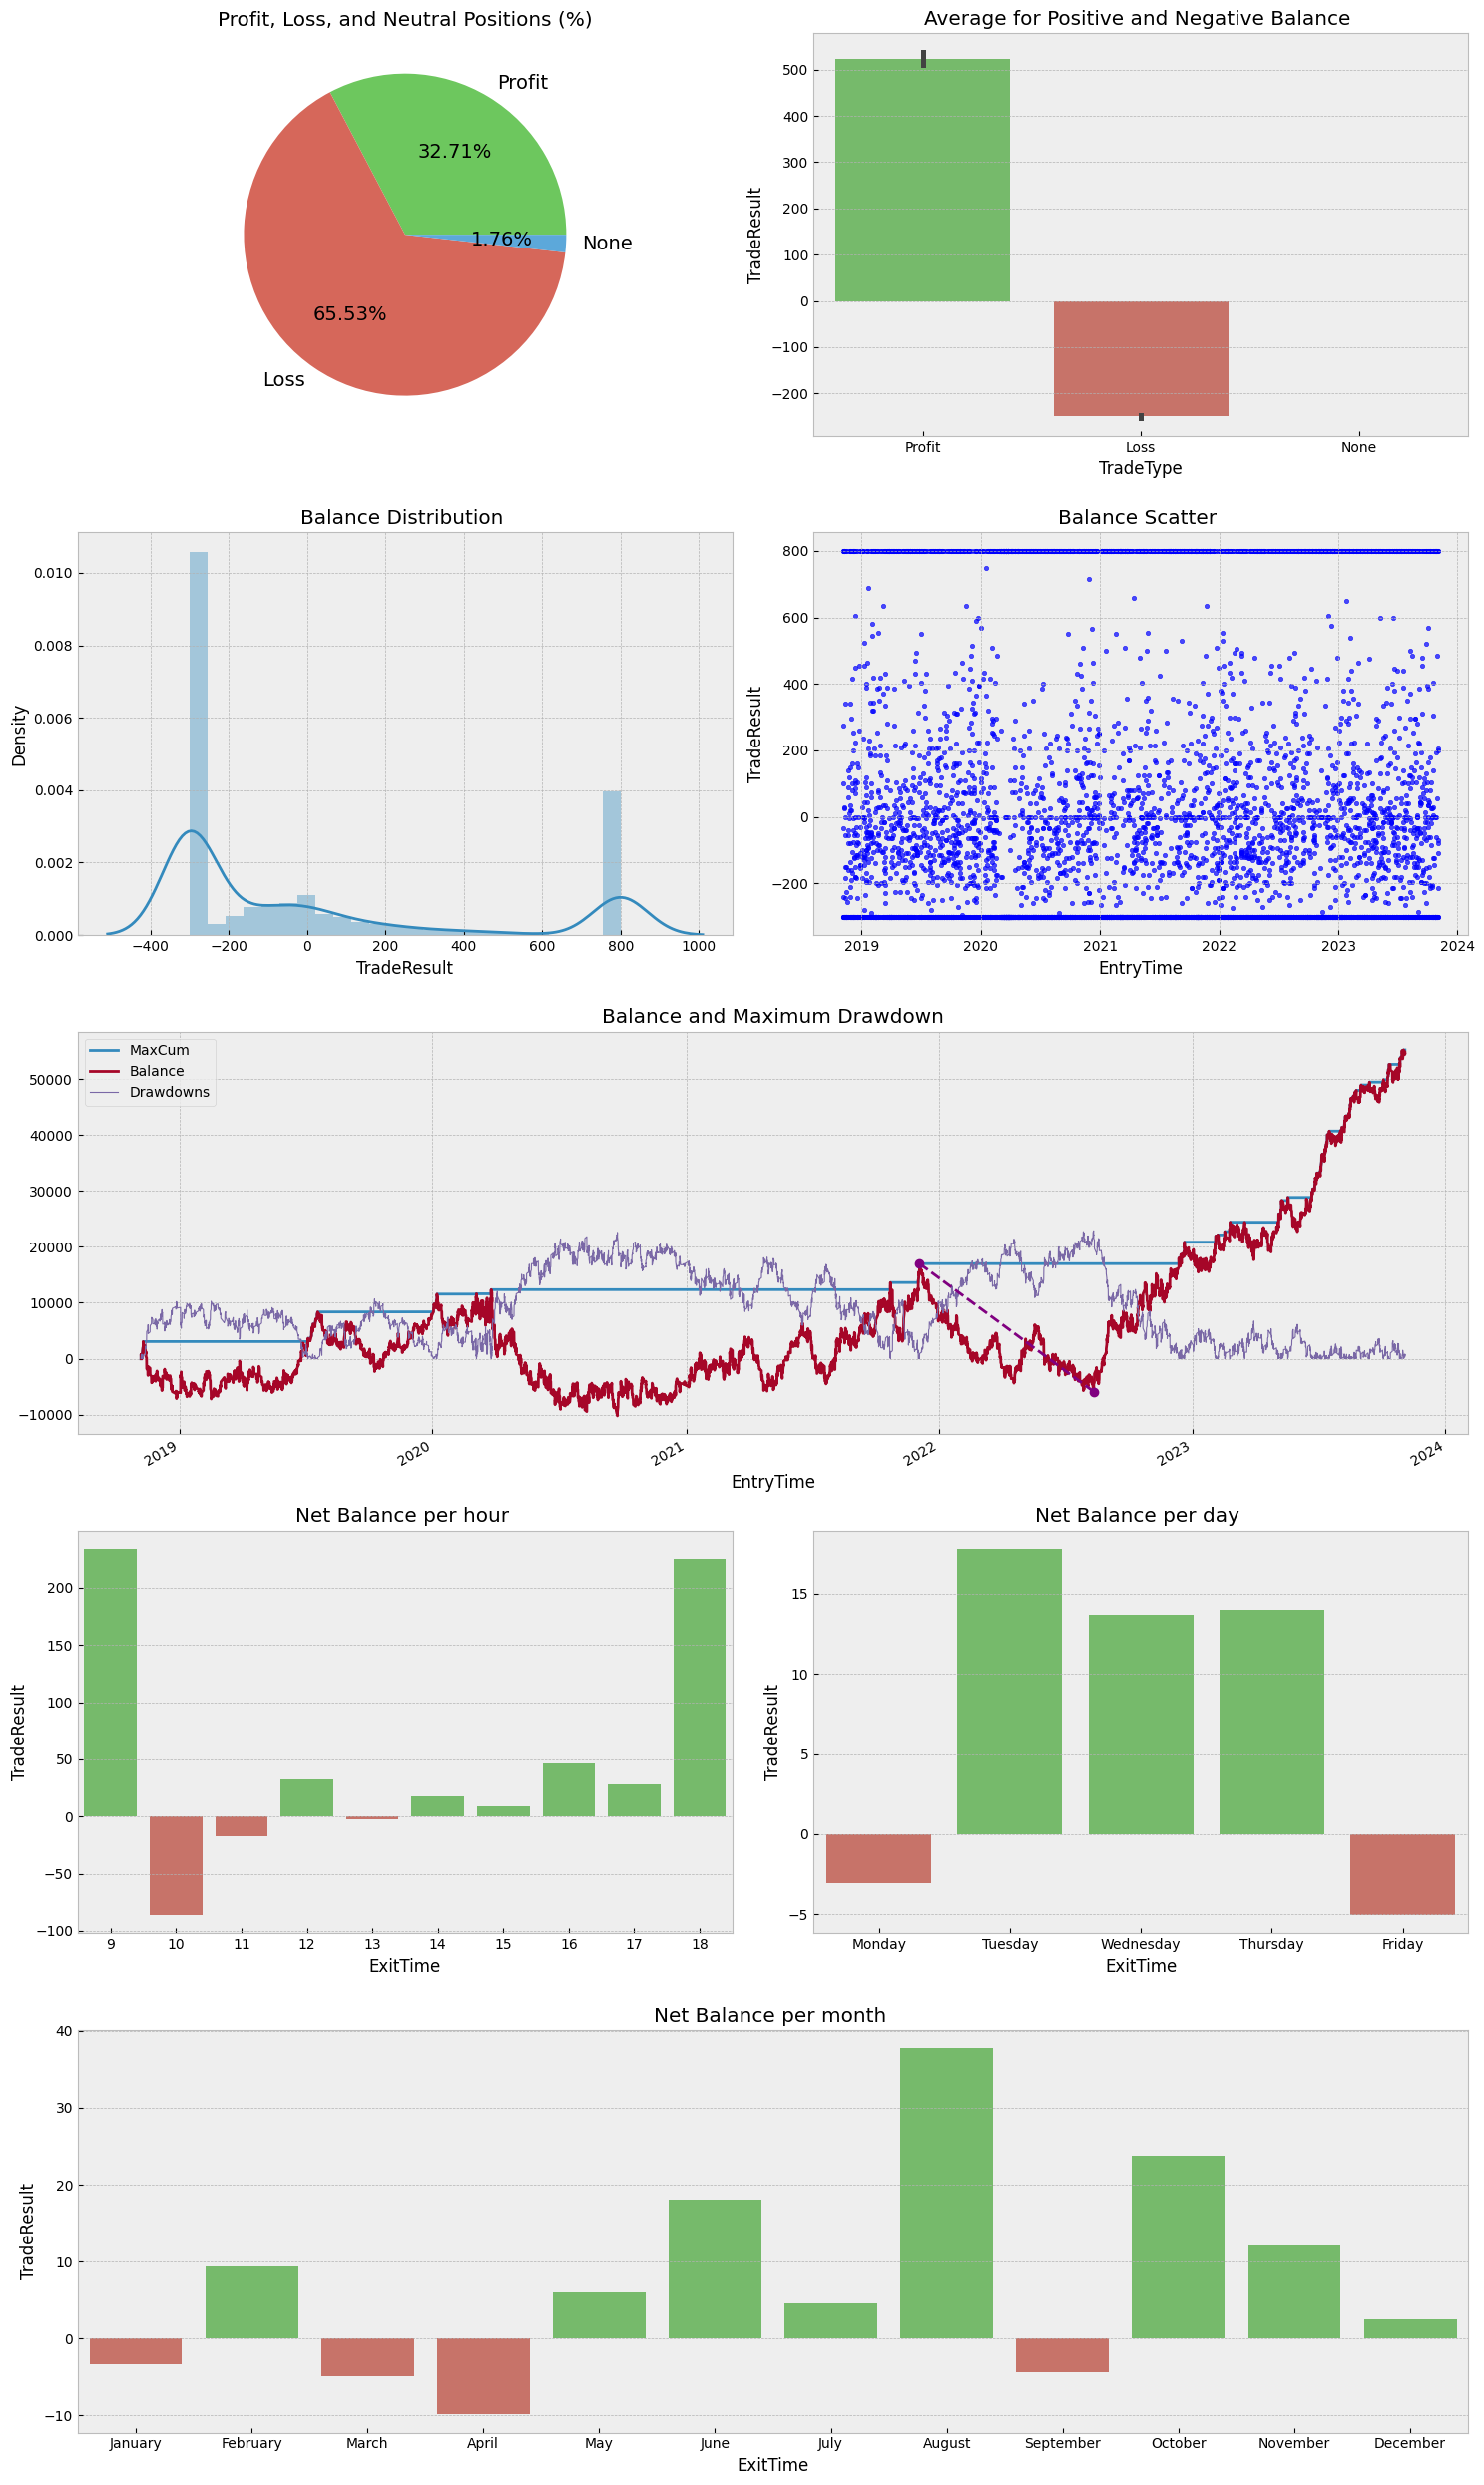

In [10]:
opt.get_max_profit_factor_bt()['bt'].get_report_pointer().plot_report()